<a href="https://colab.research.google.com/github/svishak/RL-Based-Battery-Estimation/blob/main/RL%20basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Math and Code

Equation of a straight line is y=mx+b
m=slope of the line
b=y intercept

In [ ]:
def line(x,m,b):
  return m*x + b

In [ ]:
#Returns the y co-ordinate for the given values of x,m,b
line(3,2,1)

7

The expected reward calculation
$Q_{k}= (R_{1}+R_{2}+...+R_{k})/ k_{a}$

In [2]:
def exp_reward(action, history):
  rewards_for_action = history[action]
  return sum(rewards_for_action) / len(rewards_for_action)

Suppose there are two Actions and four states, the Q table would like this.
$A_{state,action} =
 \begin{pmatrix}
 0 & 0 \\
 0 & 1 \\
 1 & 0 \\
 1 & 1 \\
  \end{pmatrix}$

In [4]:

history=[[0,0],[0,1],[1,0],[1,1]]
action=1
exp_reward(action,history)

0.5

Selecting the best action. \


In [2]:
def get_best_action(actions):
  best_action = 0
  max_action_value = 0
  for i in range(len(actions)):
    cur_action_value = get_action_value(actions[i])
    if cur_action_value > max_action_value:
      best_action = i
      max_action_value = cur_action_value
    return best_action

Epsillon Greedy Strategy

In [3]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
n = 10
probs = np.random.rand(n)
eps = 0.2

In [4]:
probs

array([0.56831209, 0.78428184, 0.17744155, 0.03426653, 0.50638972,
       0.56608072, 0.81319117, 0.29240074, 0.46484761, 0.00814027])

Reward function Definition

In [6]:
def get_reward(prob, n=10):
  reward = 0
  for i in range(n):
    if random.random() < prob:
      reward += 1
  return reward

In [8]:
np.mean([get_reward(0.7) for _ in range(2000)])

6.973

Updating of reward by means of the equation \begin{equation*}
\mu_{new}= (K* \mu_{old} + X)/ (K+ 1)
\end{equation*}

In [9]:
def update_record(record,action,r):
  new_r = (record[action,0] * record[action,1] + r) / (record[action,0] +
  1)
  record[action,0] += 1
  record[action,1] = new_r
  return record

In [12]:
def get_best_arm(record):
  arm_index = np.argmax(record[:,1],axis=0)
  return arm_index

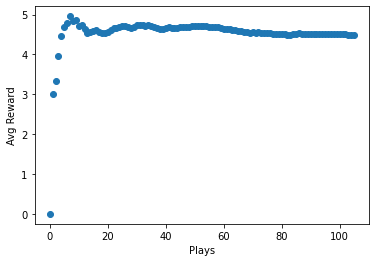

In [13]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
record = np.zeros((n,2))
probs = np.random.rand(n)
eps = 0.2
rewards = [0]
for i in range(500):
  if random.random() > eps:
    choice = get_best_arm(record)
  else:
    choice = np.random.randint(10)
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards)